# Modelos

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('data/MICRODADOS_ENEM_SP_2019.csv', low_memory = False)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q024,Q025,NO_MUNICIPIO_ESC_LON,NO_MUNICIPIO_ESC_LAT,NO_MUNICIPIO_NASCIMENTO_LON,NO_MUNICIPIO_NASCIMENTO_LAT,NO_MUNICIPIO_PROVA_LON,NO_MUNICIPIO_PROVA_LAT,NO_MUNICIPIO_RESIDENCIA_LON,NO_MUNICIPIO_RESIDENCIA_LAT
0,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,...,B,B,NaN,NaN,-48.160553,-1.296856,-48.160553,-1.296856,-46.22719,-23.319422
1,190003671803,2019,3546801,Santa Isabel,35,SP,15,M,1,2,...,B,A,NaN,NaN,-46.633382,-23.550651,-46.633382,-23.550651,-46.22719,-23.319422
2,190005877964,2019,3546801,Santa Isabel,35,SP,19,M,1,3,...,B,B,NaN,NaN,-46.633382,-23.550651,-46.633382,-23.550651,-46.22719,-23.319422
3,190005853729,2019,3546801,Santa Isabel,35,SP,22,F,1,2,...,A,B,NaN,NaN,-47.184632,-23.540125,-46.633382,-23.550651,-46.22719,-23.319422
4,190004762110,2019,3546801,Santa Isabel,35,SP,20,M,1,2,...,B,B,NaN,NaN,-46.227190,-23.319422,-46.633382,-23.550651,-46.22719,-23.319422


## Variáveis utilizadas

Inicialmente iremos fazer uma limpeza dos dados para mantér apenas aqueles que são úteis nos modelos, as etapas de limpeza serão:

- Remover linhas de participantes que estiveram ausentes em algum dos dois dias de provas, não é interessante modelar esses cenários pois já é possível afirmar que participantes que se ausentaram em determinado dia obterão nota 0. E removemos as colunas que indicam presença (dados restantes só possuem participantes presentes).

- Criamos a coluna 'NOTA' com a nota média. E removemos as colunas com as notas individuais em cada uma das provas.

- Removemos colunas que sabemos que não possuem relação com o resultado nas provas: númeo de inscrição; ano da prova; código da escola; se optou por nome social; se optou por cadeira para canhoto;

- Removemos colunas que possuem informações espaciais pois não usaremos elas nos modelos. As variáveis podem assumir muitos valores nominais distintos, gerando dados que não obterão bons resultados nos modelos.

- As variáveis que indicam deficiência foram agrupadas em uma única variável que indica se o particpante possui alguma defiência ou não. As colunas que indicam a deficiência específica foram removidas.

- As variáveis que indicam necessidade de atendimento especial também foram agrupadas em uma única variável. As demais foram removidas.

- Removemos as variáveis sobre algumas perguntas socioeconômicas: profissão do pai; profissão da mãe.


In [42]:
#keeping only the rows where the student went to the test
df = df[(df.TP_PRESENCA_CN == 1) & (df.TP_PRESENCA_CH == 1) &
       (df.TP_PRESENCA_LC == 1) & (df.TP_PRESENCA_MT == 1)]
#removing presence columns
df = df.drop(columns = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'])
#creating NU_NOTA column
df['NOTA'] = 0.2 * (df.NU_NOTA_CN + df.NU_NOTA_CH + df.NU_NOTA_MT + df.NU_NOTA_LC + df.NU_NOTA_REDACAO)
#removing other notes columns
df = df.drop(columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC',
                        'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
                        'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'TP_STATUS_REDACAO'])
#removing columns that don't have relation with the result in the test
df = df.drop(columns = ['NU_INSCRICAO', 'NU_ANO', 'CO_ESCOLA', 'IN_NOME_SOCIAL', 'IN_CADEIRA_CANHOTO'])
#removing columns with loction information
df = df.drop(columns = ['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA',
                       'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 
                       'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'CO_MUNICIPIO_PROVA',  'NO_MUNICIPIO_PROVA',
                       'CO_UF_PROVA', 'SG_UF_PROVA', 'NO_MUNICIPIO_ESC_LON', 'NO_MUNICIPIO_ESC_LAT',
                       'NO_MUNICIPIO_NASCIMENTO_LON', 'NO_MUNICIPIO_NASCIMENTO_LAT', 'NO_MUNICIPIO_PROVA_LON',
                       'NO_MUNICIPIO_PROVA_LAT', 'NO_MUNICIPIO_RESIDENCIA_LON', 'NO_MUNICIPIO_RESIDENCIA_LAT'])
#unifying columns
df['DEFICIENCIA'] = (df.IN_BAIXA_VISAO | df.IN_CEGUEIRA | df.IN_SURDEZ | df.IN_DEFICIENCIA_AUDITIVA | 
                    df.IN_SURDO_CEGUEIRA | df.IN_DEFICIENCIA_FISICA | df.IN_DEFICIENCIA_MENTAL | 
                    df.IN_DEFICIT_ATENCAO | df.IN_DISLEXIA | df.IN_DISCALCULIA | df.IN_AUTISMO |
                    df.IN_VISAO_MONOCULAR | df.IN_OUTRA_DEF)
#removing individual columns
df = df.drop(columns = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                       'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF'])

#uniying columns
df['ATENDIMENTO_ESPECIAL'] = (df.IN_GESTANTE | df.IN_LACTANTE | df.IN_IDOSO | df.IN_ESTUDA_CLASSE_HOSPITALAR |
                             df.IN_BRAILLE | df.IN_AMPLIADA_24 | df.IN_AMPLIADA_18 | df.IN_LEDOR | df.IN_ACESSO | 
                             df.IN_TRANSCRICAO | df.IN_LIBRAS | df.IN_TEMPO_ADICIONAL | df.IN_LEITURA_LABIAL |
                             df.IN_MESA_CADEIRA_RODAS | df.IN_MESA_CADEIRA_SEPARADA | df.IN_APOIO_PERNA |
                             df.IN_GUIA_INTERPRETE | df.IN_COMPUTADOR | df.IN_CADEIRA_ESPECIAL | df.IN_CADEIRA_ACOLCHOADA |
                             df.IN_PROVA_DEITADO | df.IN_MOBILIARIO_OBESO | df.IN_LAMINA_OVERLAY | df.IN_PROTETOR_AURICULAR |
                             df.IN_MEDIDOR_GLICOSE | df.IN_MAQUINA_BRAILE | df.IN_SOROBAN | df.IN_MARCA_PASSO |
                             df.IN_SONDA | df.IN_MEDICAMENTOS | df.IN_SALA_INDIVIDUAL | df.IN_SALA_ESPECIAL |
                             df.IN_SALA_ACOMPANHANTE | df.IN_MOBILIARIO_ESPECIFICO | df.IN_MATERIAL_ESPECIFICO) 
#removing individual columns
df = df.drop(columns = ['IN_TREINEIRO', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 
                        'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 
                        'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 
                        'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 
                        'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 
                        'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 
                        'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 
                        'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO'])

df = df.drop(columns = ['Q003', 'Q004', ])
#renaming columns
def rename_cols(col):
    if col[:2] == 'NU' or col[:2] == 'TP':
        return col[3:]
    elif col[0] == 'Q':
        questions_dict = {'Q001': 'ESTUDO_PAI', 'Q002': 'ESTUDO_MAE', 'Q005': 'PESSOAS_RESIDENCIA', 
                         'Q006': 'RENDA', 'Q007':'EMPREGADO_DOMESTICO', 'Q008':'BANHEIRO', 'Q009':'QUARTOS',
                         'Q010': 'CARRO', 'Q011': 'MOTO', 'Q012': 'GELADEIRA', 'Q013': 'FREEZER',
                         'Q014': 'MAQUINA_LAVAR', 'Q015':'MAQUINA_SECAR', 'Q016':'MICRO_ONDAS',
                         'Q017':'LAVAR_LOUCA', 'Q018':'ASPIRADOR_PO', 'Q019':'TV', 'Q020': 'DVD',
                         'Q021': 'TV_ASSINATURA', 'Q022': 'CELULAR', 'Q023': 'TELEFONE', 'Q024': 'COMPUTADOR',
                         'Q025': 'INTERNET'}
        return questions_dict[col]
    else:
        return col
        
df = df.rename(columns = rename_cols)
numeric_variables = ['IDADE', 'ANO_CONCLUIU']
categoric_variables = []
for col in df.columns:
    if not col in numeric_variables:
        categoric_variables.append(col)

## Correlação entre variáveis

Para obter bons resultados nos modelos lineares iremos procurar por colinearidades entre as variáveis escolhidas. Podemos ver que os pares de variáveis correlacionadas são: 

- Idade e estado civil;

- Idade e situação de conclusão do ensino médio;

- Idade e ano de conclusão do ensino médio; 

- 

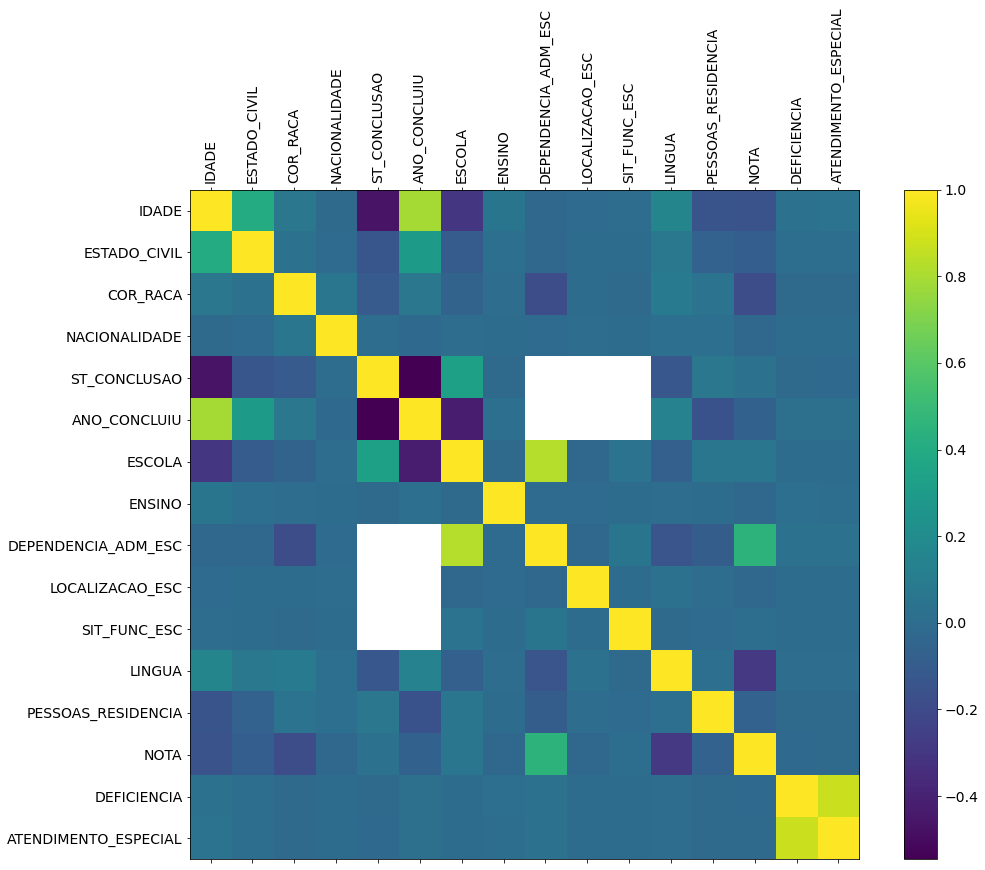

In [30]:
f = plt.figure(figsize=(16, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Matriz Correlação', fontsize=16);

In [32]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,IDADE,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,ST_CONCLUSAO,ANO_CONCLUIU,ESCOLA,ENSINO,DEPENDENCIA_ADM_ESC,LOCALIZACAO_ESC,SIT_FUNC_ESC,LINGUA,PESSOAS_RESIDENCIA,NOTA,DEFICIENCIA,ATENDIMENTO_ESPECIAL
IDADE,1.00,0.41,0.07,-0.01,-0.46,0.79,-0.30,0.06,-0.03,-0.01,0.01,0.16,-0.15,-0.15,0.04,0.04
ESTADO_CIVIL,0.41,1.00,0.03,-0.01,-0.13,0.30,-0.10,0.02,-0.02,-0.00,-0.00,0.07,-0.06,-0.08,0.01,0.01
COR_RACA,0.07,0.03,1.00,0.06,-0.10,0.06,-0.06,0.01,-0.18,0.00,-0.01,0.10,0.04,-0.18,-0.01,-0.01
NACIONALIDADE,-0.01,-0.01,0.06,1.00,0.01,-0.02,0.01,0.00,-0.01,0.00,-0.00,0.02,0.02,-0.03,0.00,-0.00
ST_CONCLUSAO,-0.46,-0.13,-0.10,0.01,1.00,-0.55,0.33,-0.01,nan,nan,nan,-0.13,0.07,0.03,-0.01,-0.02
ANO_CONCLUIU,0.79,0.30,0.06,-0.02,-0.55,1.00,-0.42,0.02,nan,nan,nan,0.14,-0.16,-0.06,0.02,0.03
ESCOLA,-0.30,-0.10,-0.06,0.01,0.33,-0.42,1.00,-0.01,0.83,-0.03,0.04,-0.07,0.06,0.06,0.00,-0.00
ENSINO,0.06,0.02,0.01,0.00,-0.01,0.02,-0.01,1.00,-0.01,-0.00,-0.00,0.01,-0.00,-0.03,0.02,0.01
DEPENDENCIA_ADM_ESC,-0.03,-0.02,-0.18,-0.01,nan,nan,0.83,-0.01,1.00,-0.03,0.06,-0.14,-0.09,0.45,0.04,0.03
LOCALIZACAO_ESC,-0.01,-0.00,0.00,0.00,nan,nan,-0.03,-0.00,-0.03,1.00,0.00,0.04,0.00,-0.02,-0.00,-0.00
